In [ ]:
#Name-Neha Somvanshi
#project_name- Avocado Project Analysis
#Batch number- DS2307

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split   #train _test split


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv',parse_dates=['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [5]:
# rename the some columns
df.rename(columns={'4046':'Small(4046)','4225':'Large(4225)','4770':'Extra_Large(4770)'},inplace=True)
df.head()

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.shape

(18249, 13)

* there are 18249 rows.
* there are 13 columns.


# Features
* Date — The date of the observation

*  Average Price — the average price of a single avocado

*  type — conventional or organic

* year — the year

* Region — the city or region of the observation

* small (4046) — Total number of avocados with PLU 4046 sold
 
* large(4225) — Total number of avocados with PLU 4225 sold
 
* extra large(4770) — Total number of avocados with PLU 4770 sold

# target
* AveragePrice

# goal 
* The goal is to predict the average price which is continuous in nature of the different type of avocado and using the region that in which region they are lying.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               18249 non-null  datetime64[ns]
 1   AveragePrice       18249 non-null  float64       
 2   Total Volume       18249 non-null  float64       
 3   Small(4046)        18249 non-null  float64       
 4   Large(4225)        18249 non-null  float64       
 5   Extra_Large(4770)  18249 non-null  float64       
 6   Total Bags         18249 non-null  float64       
 7   Small Bags         18249 non-null  float64       
 8   Large Bags         18249 non-null  float64       
 9   XLarge Bags        18249 non-null  float64       
 10  type               18249 non-null  object        
 11  year               18249 non-null  int64         
 12  region             18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory 

* there are two categorical columns i.e type ,region

In [8]:
df.isnull().sum()

Date                 0
AveragePrice         0
Total Volume         0
Small(4046)          0
Large(4225)          0
Extra_Large(4770)    0
Total Bags           0
Small Bags           0
Large Bags           0
XLarge Bags          0
type                 0
year                 0
region               0
dtype: int64

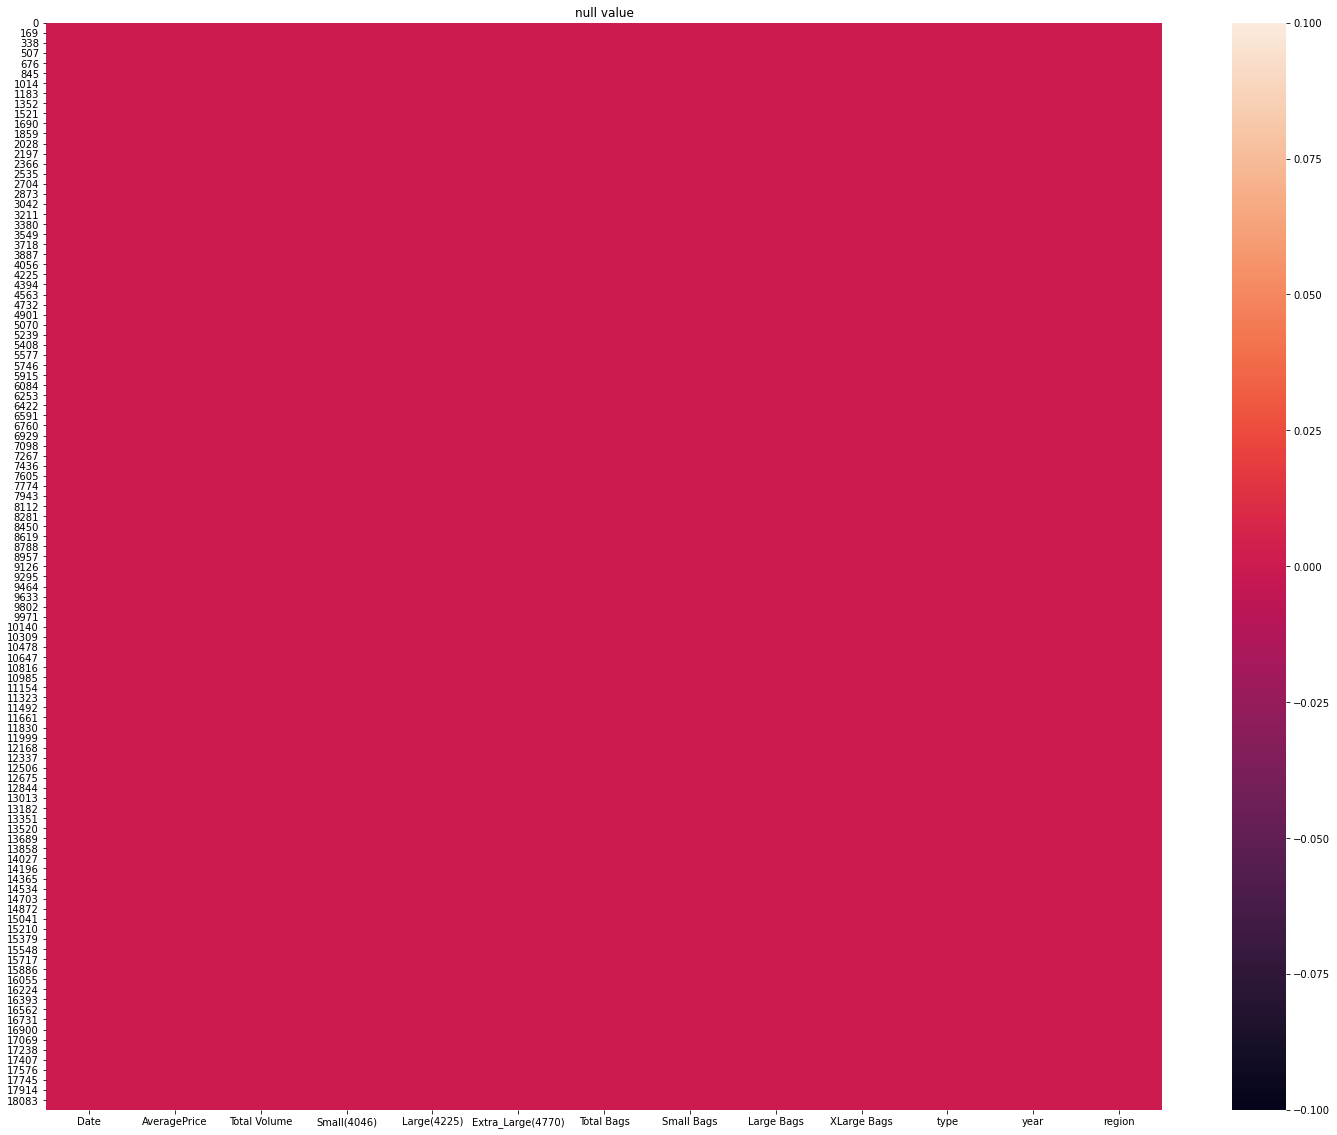

In [9]:
plt.figure(figsize=[25,20])
sns.heatmap(df.isnull())
plt.title('null value')
plt.show()

* there is no null value present in the data set 

In [10]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

* there are two type of avocado conventional type and organic type.

<AxesSubplot:xlabel='type', ylabel='count'>

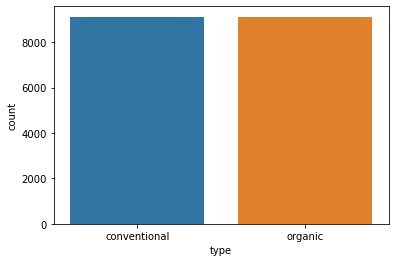

In [11]:
sns.countplot(df['type'])

#  Univarient analysis

(array([ 331., 2632., 4824., 4506., 3412., 1672.,  598.,  177.,   86.,
          11.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <BarContainer object of 10 artists>)

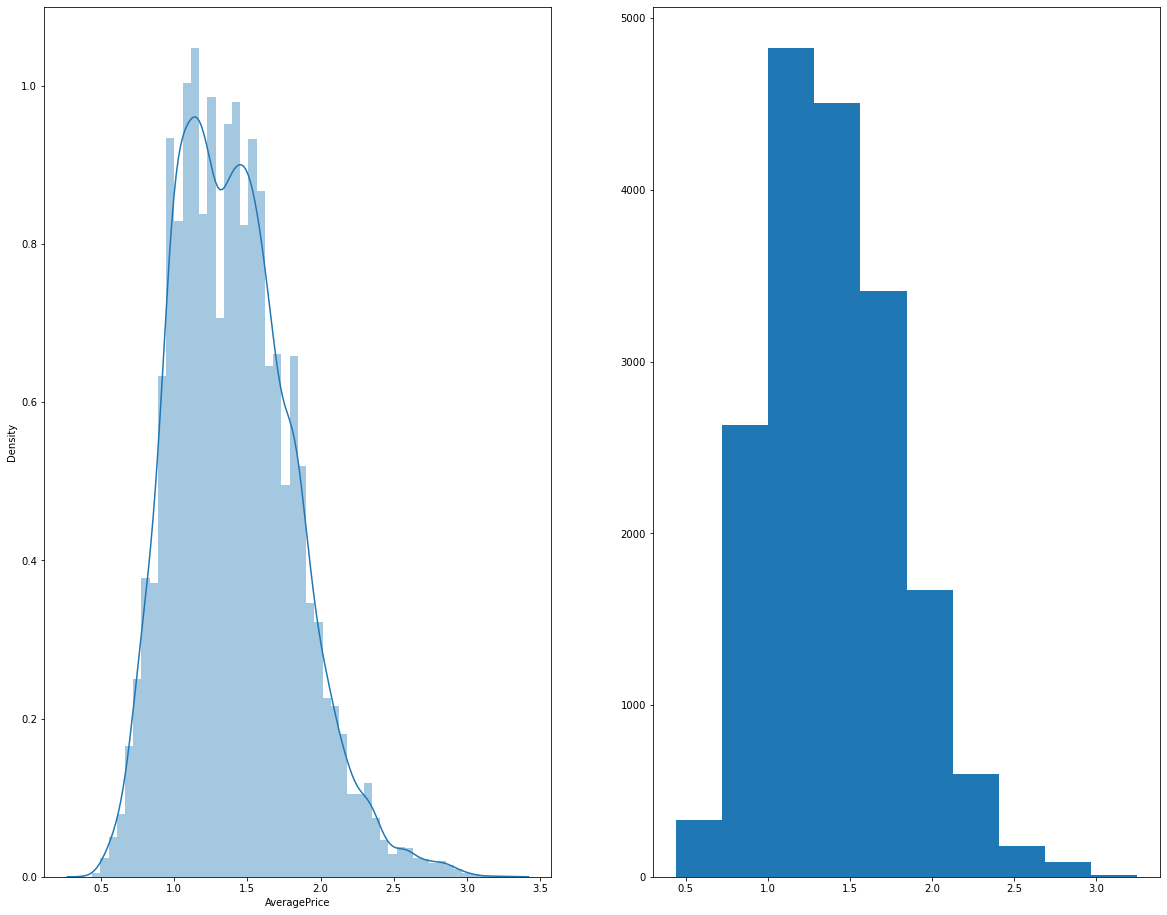

In [12]:
fig=plt.figure(figsize=(20,16))

fig.add_subplot(121)
sns.distplot(df.AveragePrice)

fig.add_subplot(122)
plt.hist(df.AveragePrice)

In [13]:
print('minimum price is:-',df['AveragePrice'].min())
print('maximum price is:-',df['AveragePrice'].max())

minimum price is:- 0.44
maximum price is:- 3.25


In [14]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

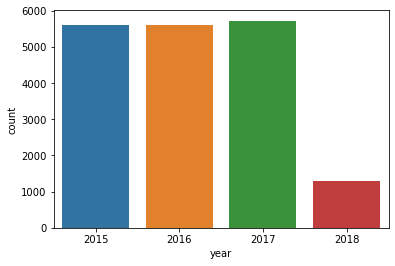

In [15]:
sns.countplot(df['year'])

* number of avocado selling   is quite similar for 2015,2016,2017. but selling decrease in 2018.

#  Bivarient analysis

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

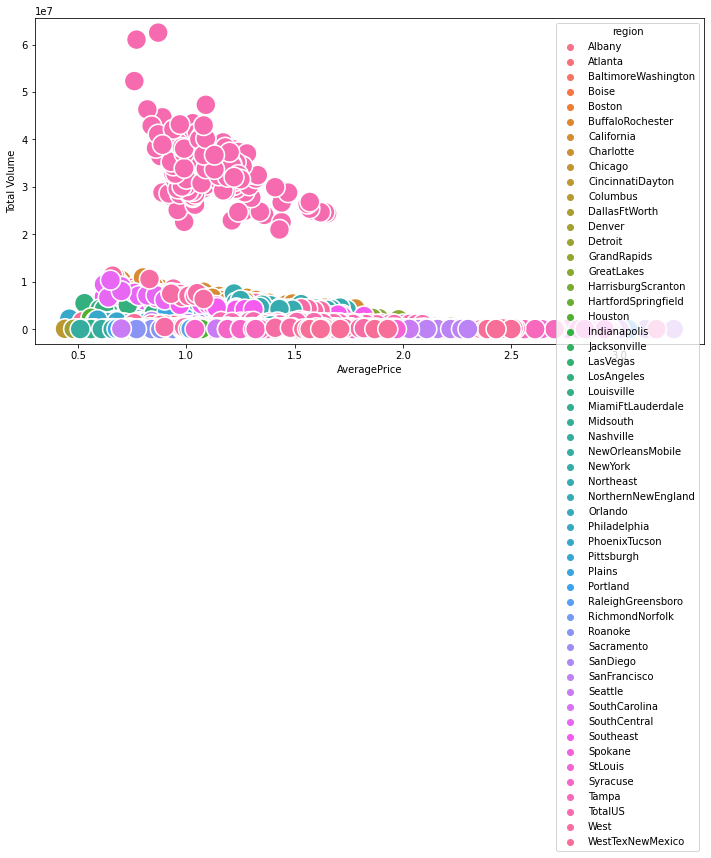

In [16]:
# price to volumne
plt.figure(figsize=(12,6))
sns.scatterplot(df["AveragePrice"],df['Total Volume'],hue=df['region'],s=400,marker="o")

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

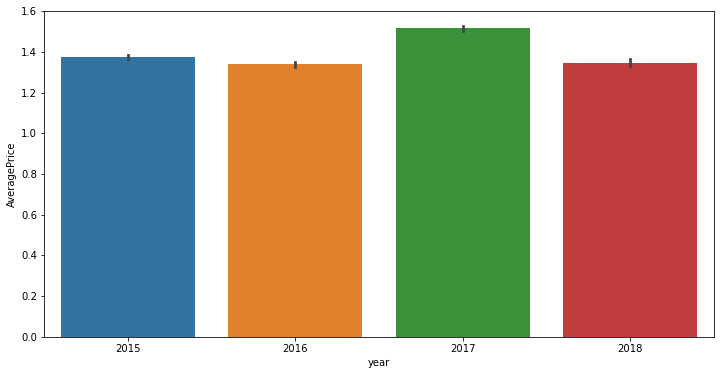

In [17]:
# price to year
plt.figure(figsize=(12,6))
sns.barplot(y=df['AveragePrice'],x=df['year'],data=df)

* avocado price is almost same in 2015,2016,2018 but small increment in 2017.

# Multivarient analysis

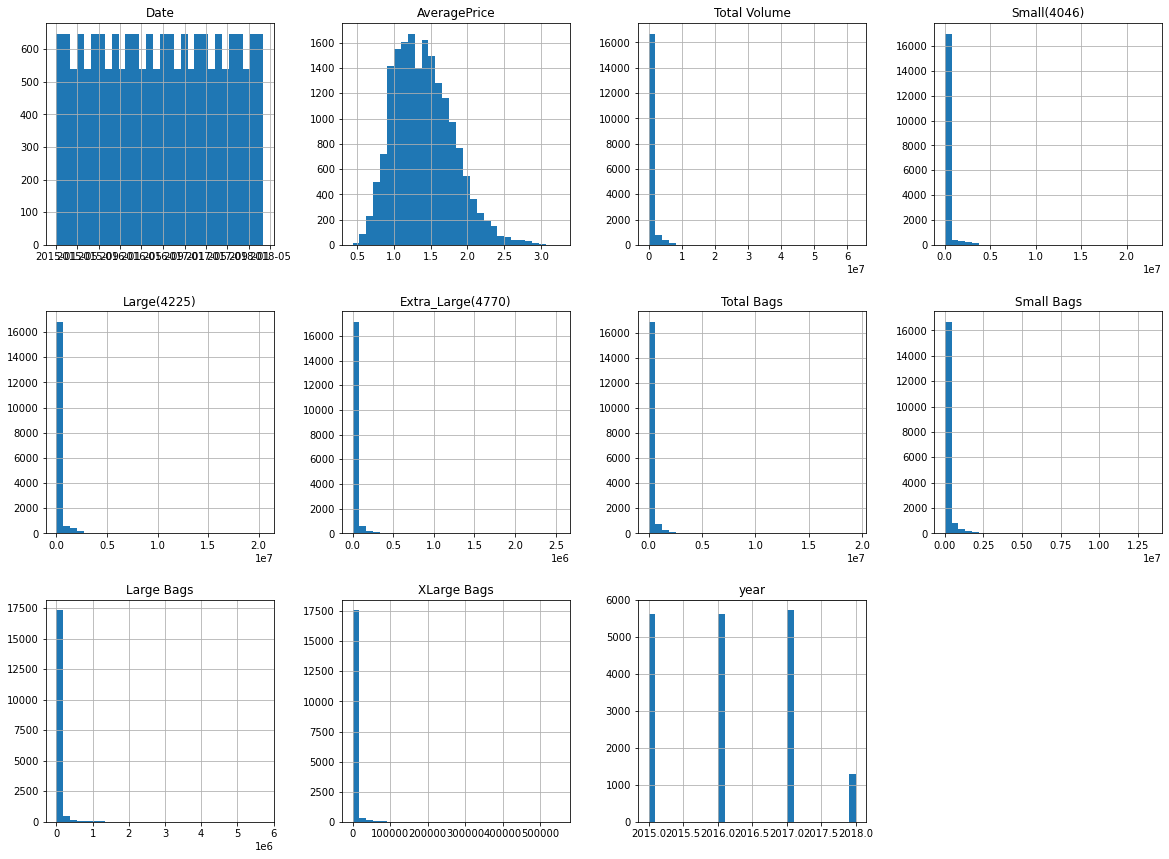

In [18]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)
plt.show()

From plotting this histogram, I used the bin size as 30, we can take any bin size (suited as per as data).
* Average price column is normally distributing over the histogram.
* Rest of the data are not much varying in term of numbers, so they are almost left skewed data
* To make the column as normal distributed we can use different methods, but I am using numPy log to   make the skew values as normal distributed.

In [19]:
#sns.pairplot(df)

In [20]:
df.corr()

,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
Small(4046),-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
Large(4225),-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
Extra_Large(4770),-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

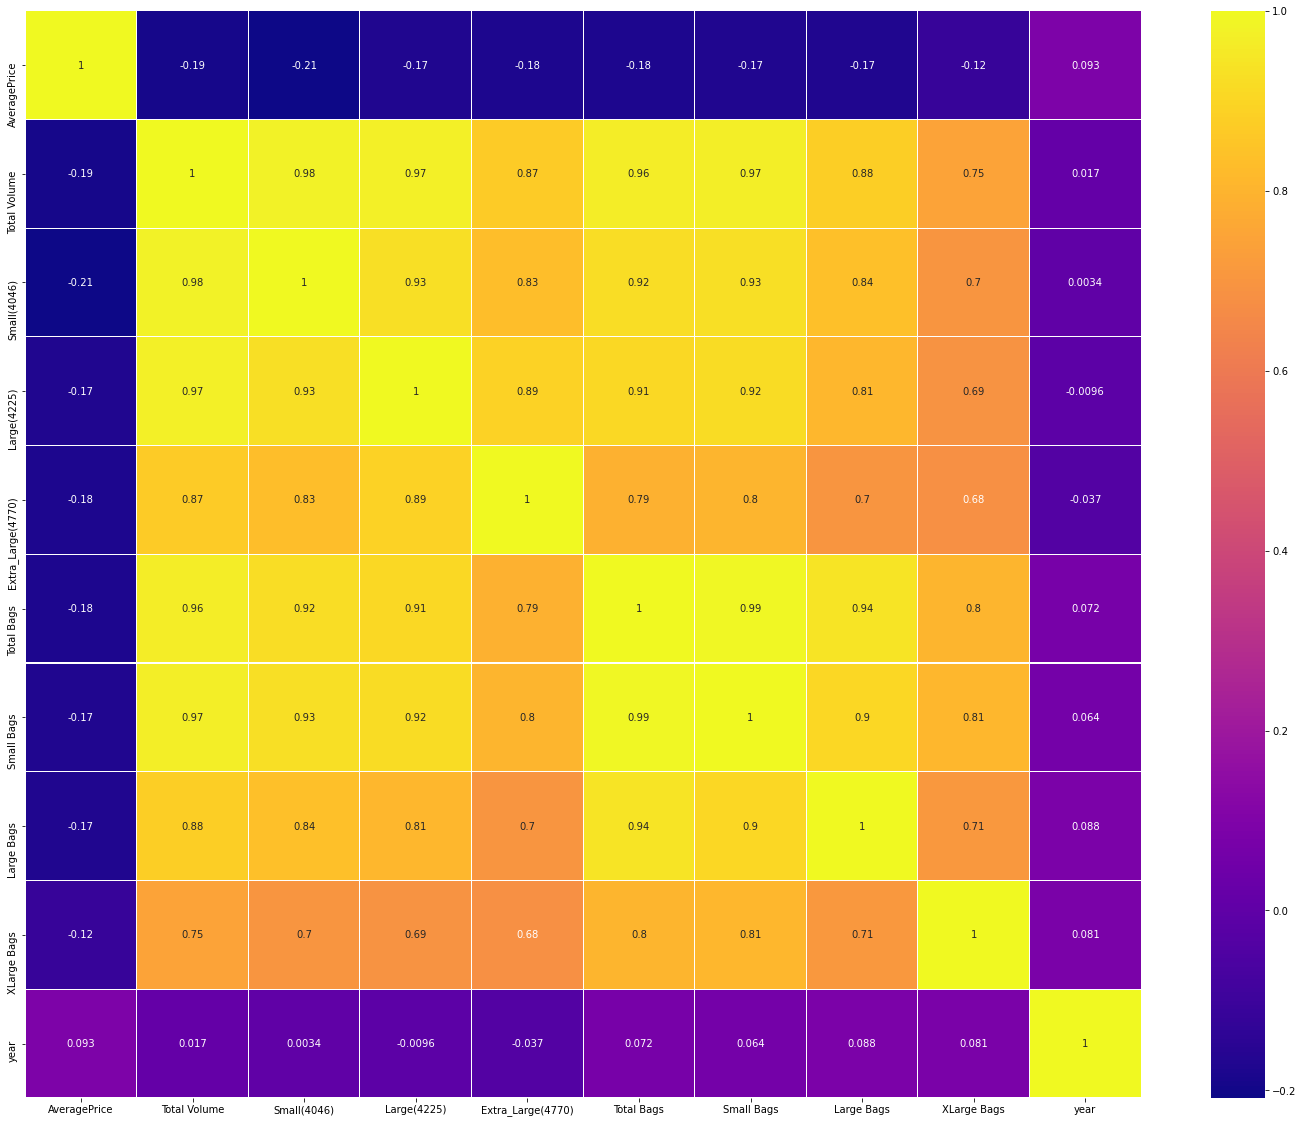

In [21]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,cmap='plasma')

* Negative corelation exist between most of columns.like Large Bags, Small Bags,Total Bags,Extra Bags.

In [22]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()

df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               18249 non-null  datetime64[ns]
 1   AveragePrice       18249 non-null  float64       
 2   Total Volume       18249 non-null  float64       
 3   Small(4046)        18249 non-null  float64       
 4   Large(4225)        18249 non-null  float64       
 5   Extra_Large(4770)  18249 non-null  float64       
 6   Total Bags         18249 non-null  float64       
 7   Small Bags         18249 non-null  float64       
 8   Large Bags         18249 non-null  float64       
 9   XLarge Bags        18249 non-null  float64       
 10  type               18249 non-null  int32         
 11  year               18249 non-null  int64         
 12  region             18249 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(2), int64(1)
memory u

In [23]:
df.drop(['Date'],axis=1,inplace=True)

# Outlier detection

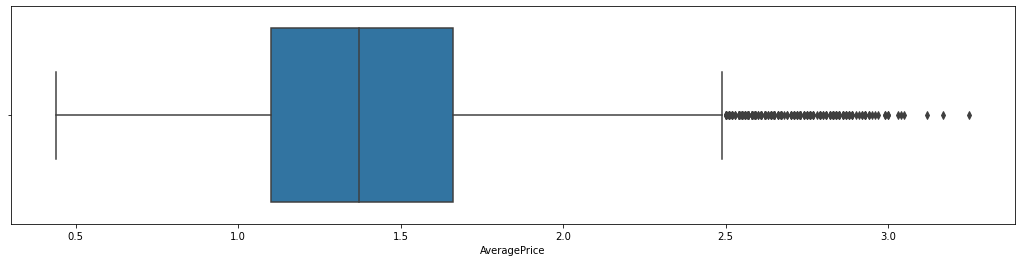

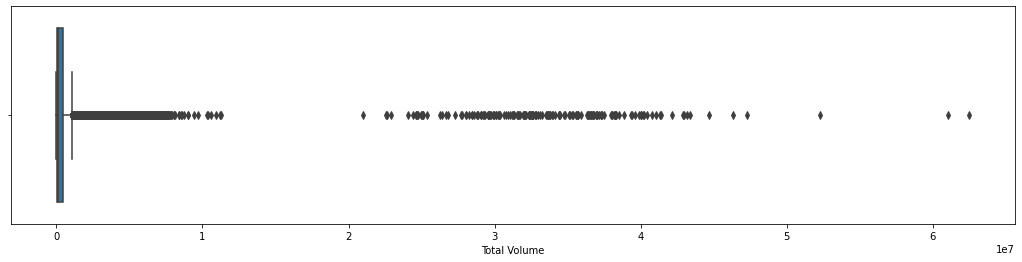

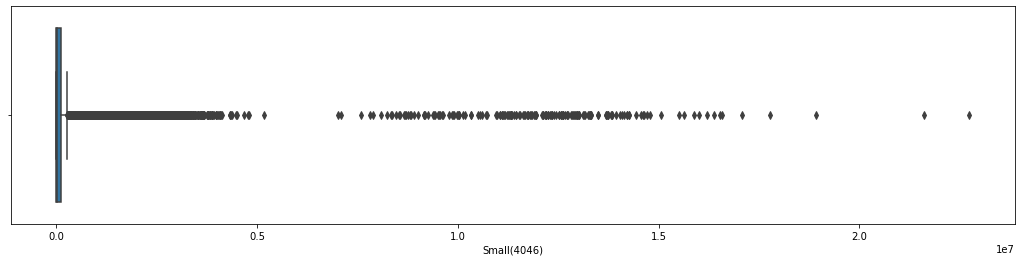

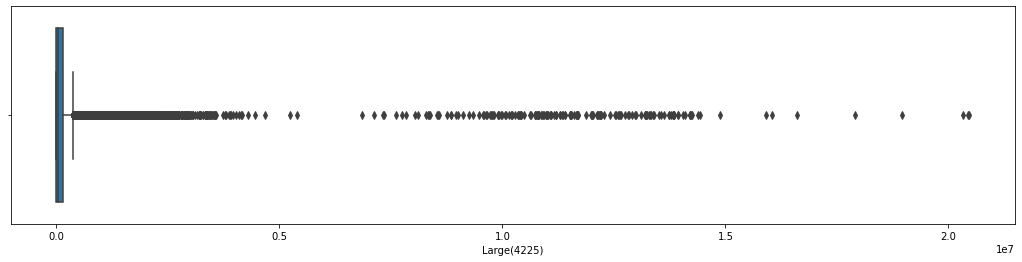

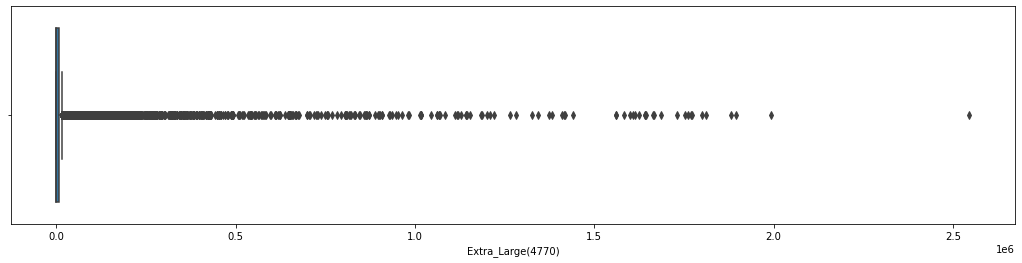

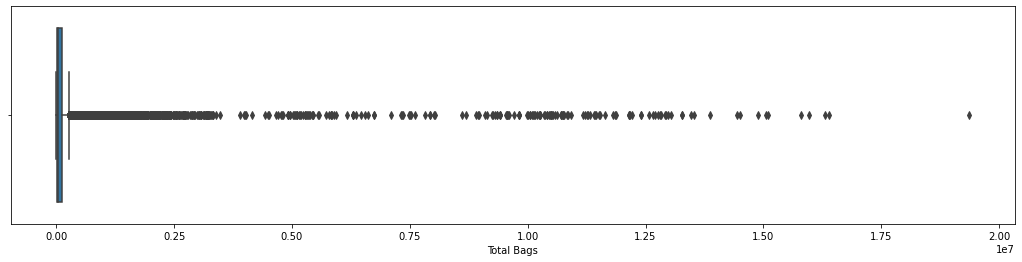

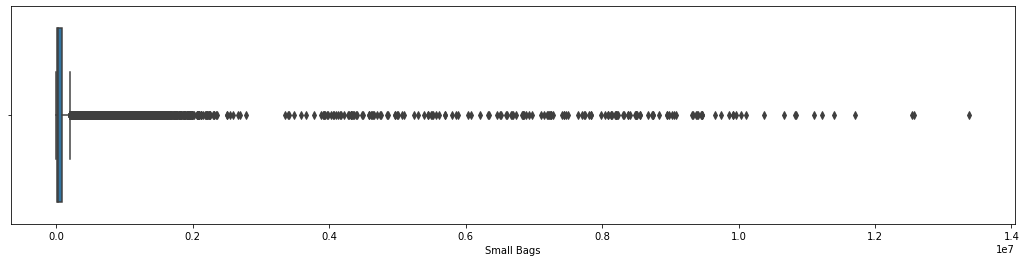

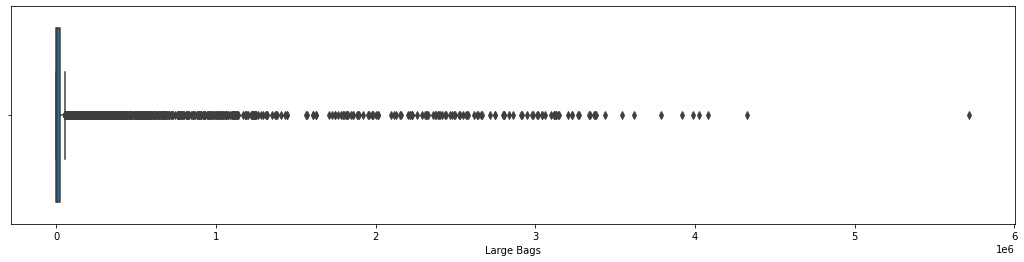

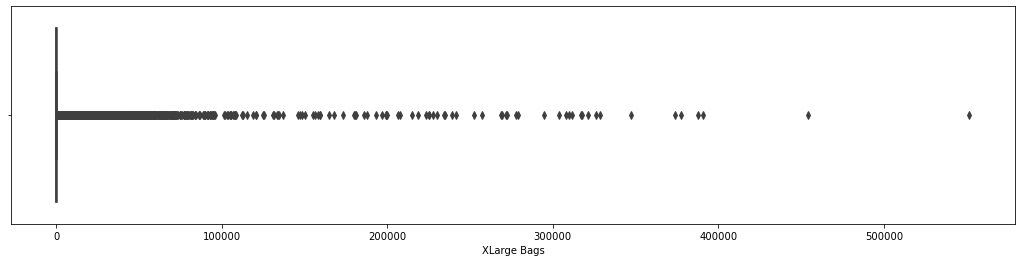

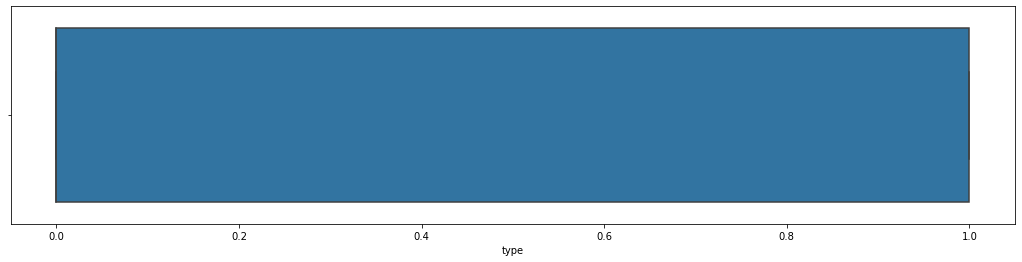

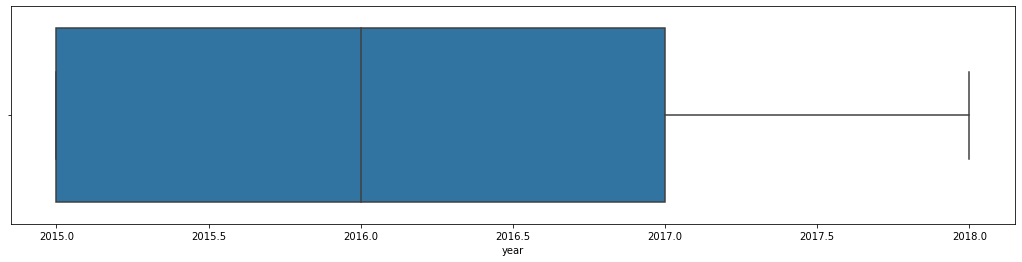

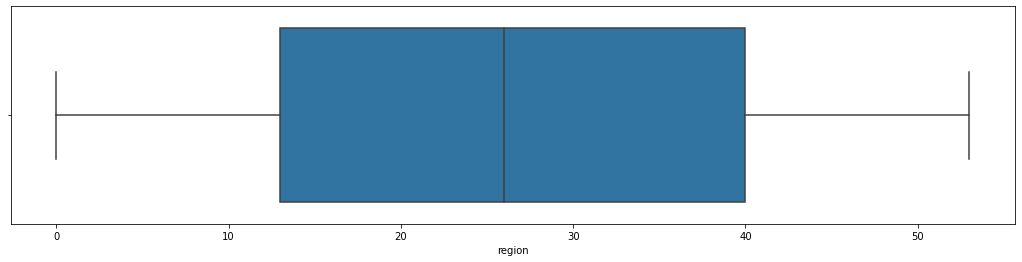

In [24]:
# plotting a box plt for each of the feature seperately:
for col in df:
    plt.figure(figsize=(18,4))
    sns.boxplot(df[col])
    plt.show()

In [25]:
# addressing outliers using the IOR:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

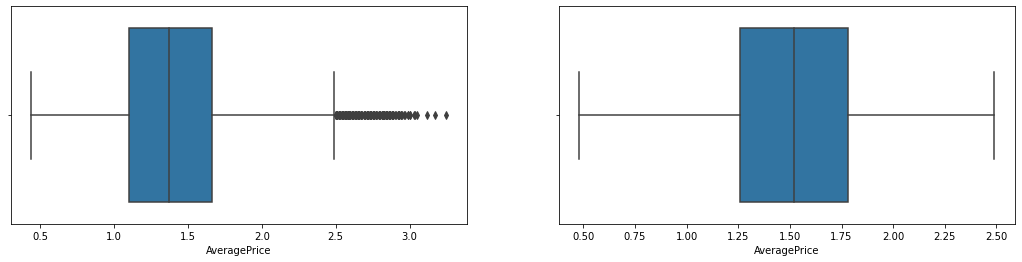

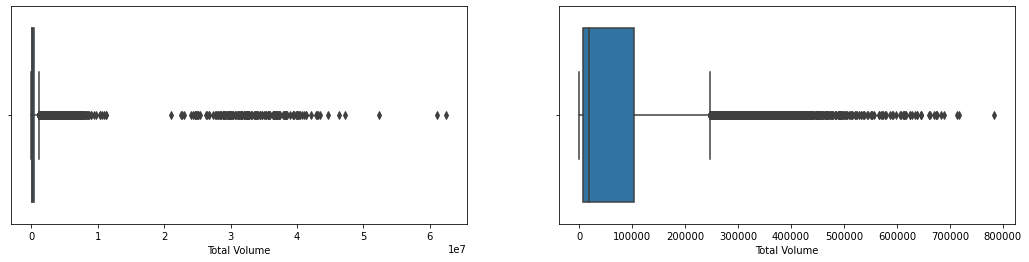

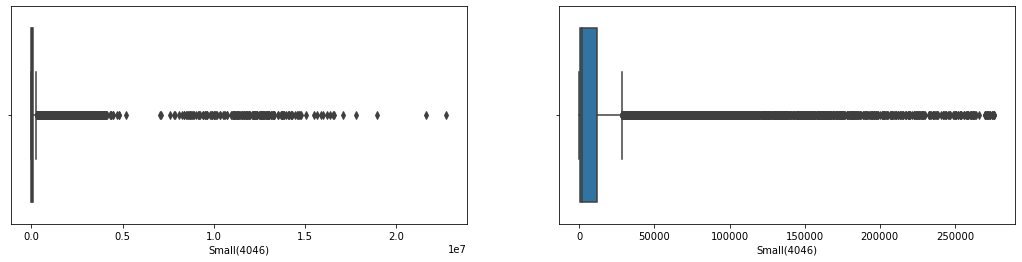

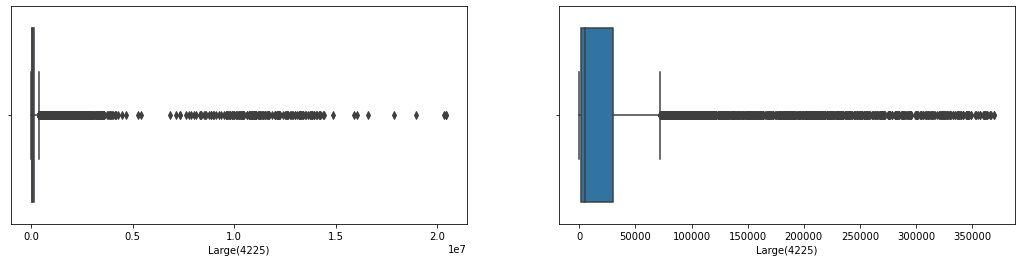

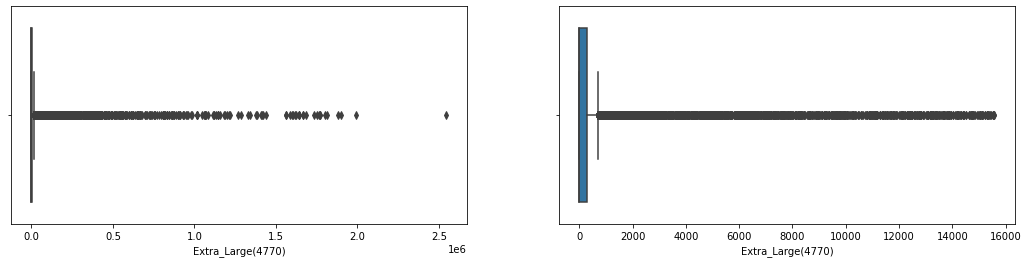

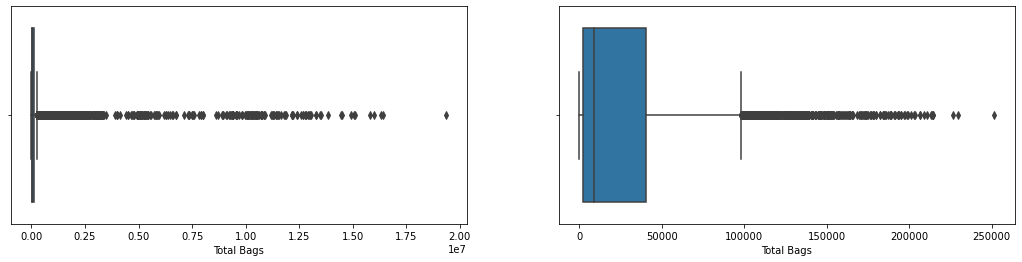

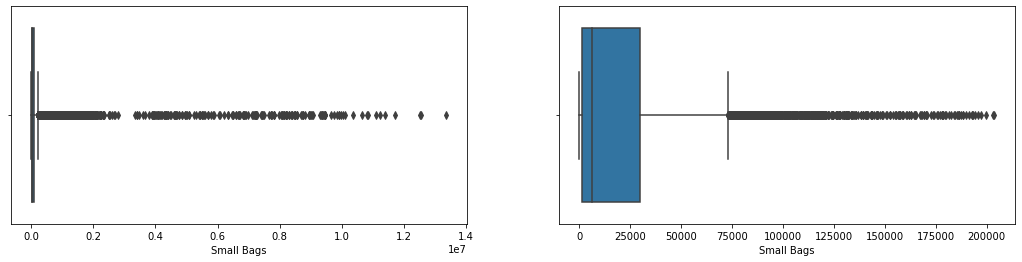

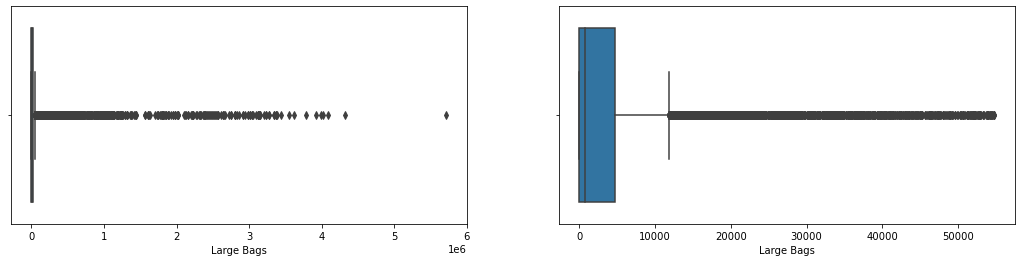

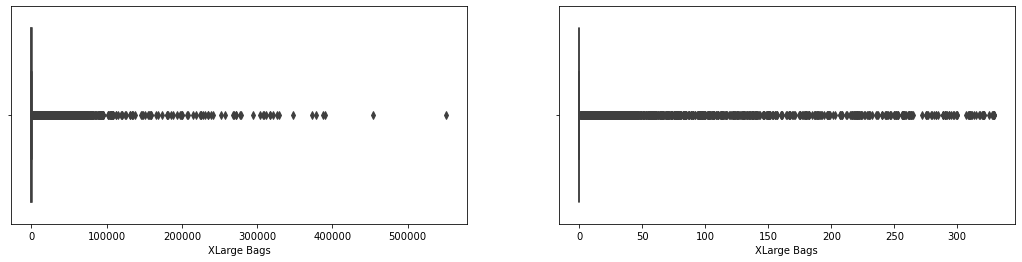

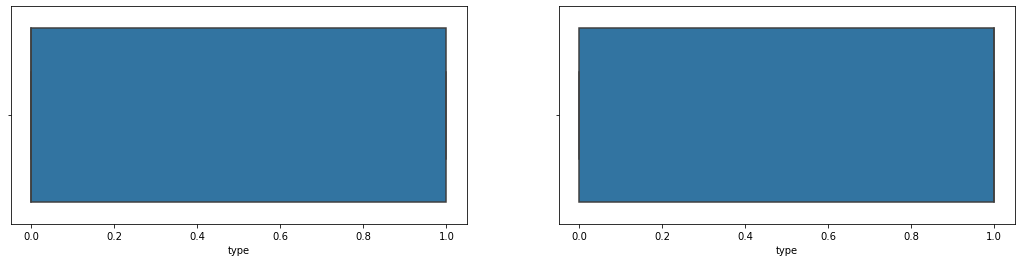

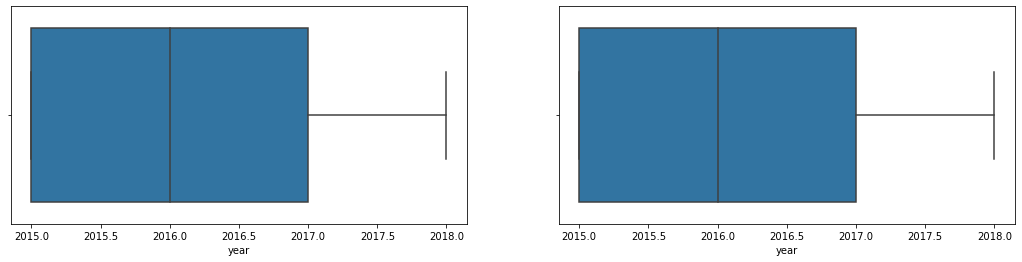

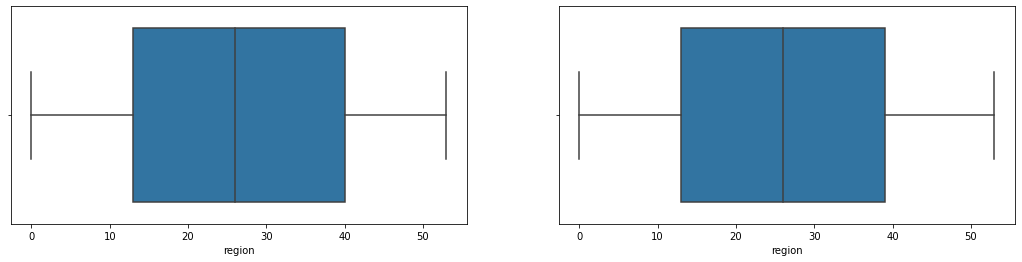

In [26]:
for col in df:
    fig = plt.figure(figsize=(18,4))
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    
    fig.add_subplot(122)
    sns.boxplot(df_clean[col])
    plt.show()

In [27]:
df_clean.skew()

AveragePrice         0.178568
Total Volume         2.089438
Small(4046)          3.221956
Large(4225)          3.311853
Extra_Large(4770)    3.776141
Total Bags           1.894051
Small Bags           2.131918
Large Bags           2.685981
XLarge Bags          6.077403
type                -1.142886
year                 0.297241
region              -0.022111
dtype: float64

In [28]:
df_clean.columns

Index(['AveragePrice', 'Total Volume', 'Small(4046)', 'Large(4225)',
       'Extra_Large(4770)', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [29]:
skew=('AveragePrice', 'Total Volume', 'Small(4046)', 'Large(4225)',
       'Extra_Large(4770)', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region')
for col in skew:
    
    if df_clean.skew().loc[col]>0.55:
        
        df_clean[col]=np.log(df_clean+1)
        

In [30]:
df_clean.skew()

AveragePrice         0.178568
Total Volume        -0.158725
Small(4046)         -0.158725
Large(4225)         -0.158725
Extra_Large(4770)   -0.158725
Total Bags          -0.158725
Small Bags          -0.158725
Large Bags          -0.158725
XLarge Bags         -0.158725
type                -1.142886
year                 0.297241
region              -0.022111
dtype: float64

In [31]:
df=df_clean

In [32]:
df.skew()

AveragePrice         0.178568
Total Volume        -0.158725
Small(4046)         -0.158725
Large(4225)         -0.158725
Extra_Large(4770)   -0.158725
Total Bags          -0.158725
Small Bags          -0.158725
Large Bags          -0.158725
XLarge Bags         -0.158725
type                -1.142886
year                 0.297241
region              -0.022111
dtype: float64

In [33]:
df.corr()

,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,0.996017,0.996017,0.996017,0.996017,0.996017,0.996017,0.996017,0.996017,0.513083,0.076743,-0.005081
Total Volume,0.996017,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.523161,0.075680,-0.004547
Small(4046),0.996017,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.523161,0.075680,-0.004547
Large(4225),0.996017,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.523161,0.075680,-0.004547
Extra_Large(4770),0.996017,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.523161,0.075680,-0.004547
Total Bags,0.996017,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.523161,0.075680,-0.004547
Small Bags,0.996017,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.523161,0.075680,-0.004547
Large Bags,0.996017,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.523161,0.075680,-0.004547
XLarge Bags,0.996017,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.523161,0.075680,-0.004547
type,0.513083,0.523161,0.523161,0.523161,0.523161,0.523161,0.523161,0.523161,0.523161,1.000000,0.070062,-0.034721


<AxesSubplot:>

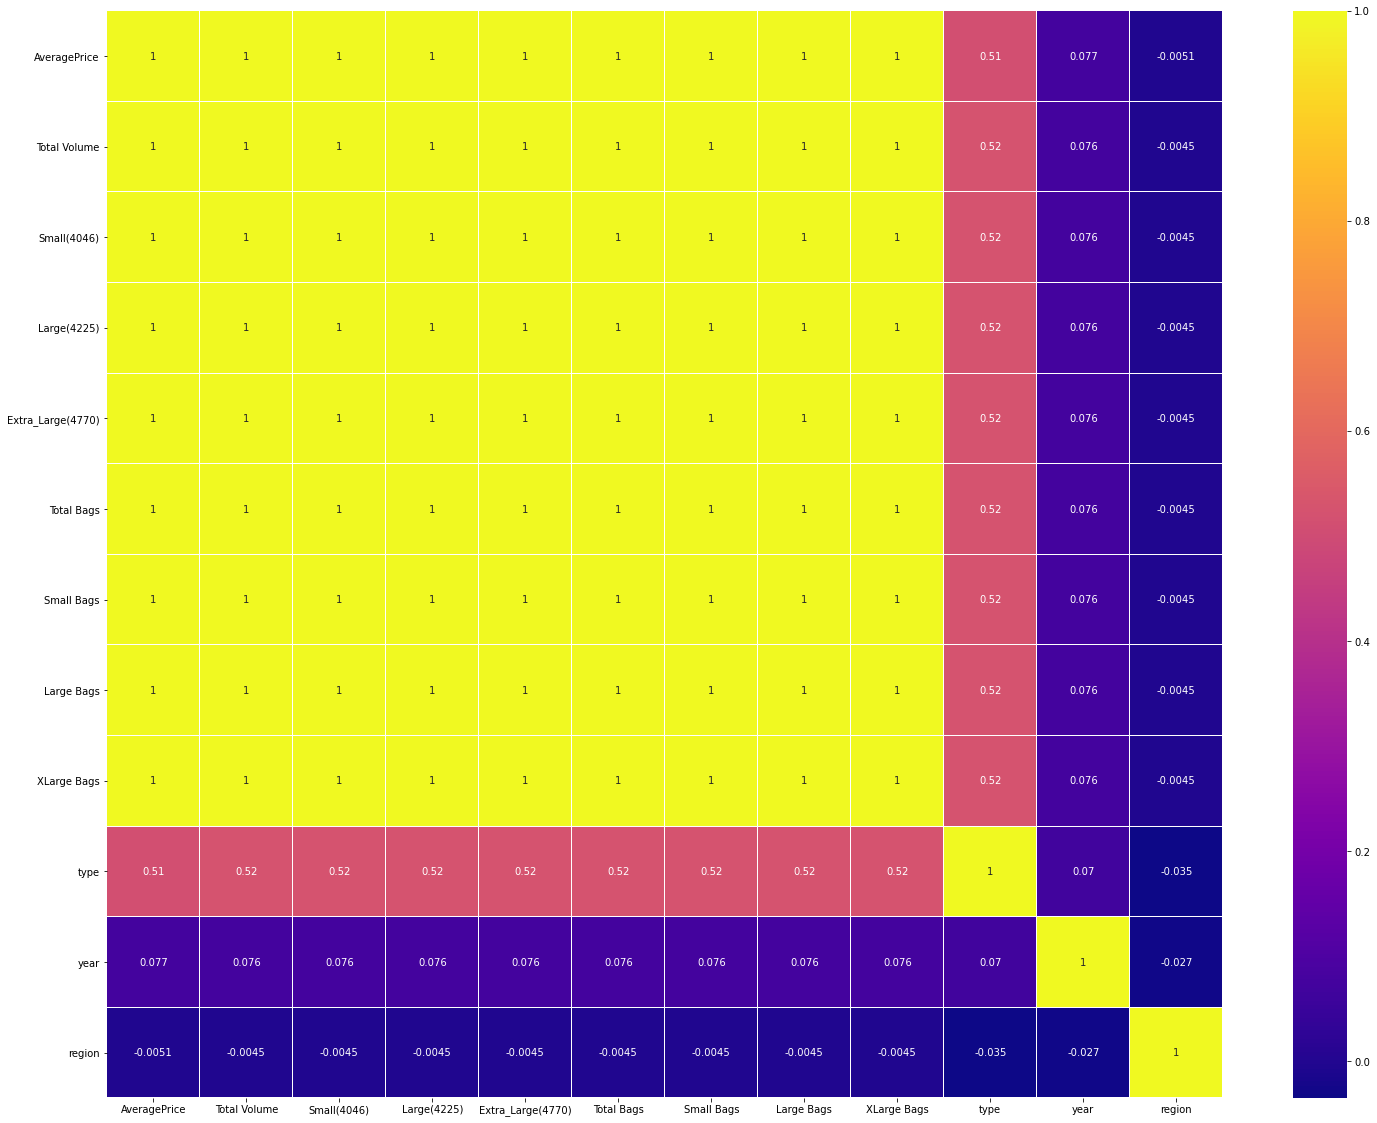

In [34]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,cmap='plasma')

# Scaling data set

In [35]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

In [36]:
x.head()

,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.845868,0.845868,0.845868,0.845868,0.845868,0.845868,0.845868,0.845868,0,2015,0
1,0.854415,0.854415,0.854415,0.854415,0.854415,0.854415,0.854415,0.854415,0,2015,0
2,0.657520,0.657520,0.657520,0.657520,0.657520,0.657520,0.657520,0.657520,0,2015,0
3,0.732368,0.732368,0.732368,0.732368,0.732368,0.732368,0.732368,0.732368,0,2015,0
4,0.824175,0.824175,0.824175,0.824175,0.824175,0.824175,0.824175,0.824175,0,2015,0


In [37]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [38]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_new=scale.fit_transform(x)
x_new

array([[-0.50862692, -0.50862692, -0.50862692, ..., -1.72309032,
        -1.15129392, -1.69344739],
       [-0.44848615, -0.44848615, -0.44848615, ..., -1.72309032,
        -1.15129392, -1.69344739],
       [-1.83392576, -1.83392576, -1.83392576, ..., -1.72309032,
        -1.15129392, -1.69344739],
       ...,
       [ 0.95807243,  0.95807243,  0.95807243, ...,  0.58035263,
         2.03015968,  1.75933962],
       [ 1.10365887,  1.10365887,  1.10365887, ...,  0.58035263,
         2.03015968,  1.75933962],
       [ 0.31678856,  0.31678856,  0.31678856, ...,  0.58035263,
         2.03015968,  1.75933962]])

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.30,random_state=50)

In [40]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8076, 11), (8076,), (3462, 11), (3462,))

In [41]:
# importing the training dependencies:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [42]:
# importing the evaluation metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [43]:
# helper funciton
def train_n_ret_scores(model):
    model.fit(x_train,y_train)
    
    print('Train_Acc:', model.score(x_test,y_test))
    print('Test_Acc:', model.score(x_test,y_test))
    print('R2:', r2_score(y_test,model.predict(x_test)))
    print('MSE:',mean_squared_error(y_test,model.predict(x_test)))

In [44]:
# try1: Linear Regression
train_n_ret_scores(LinearRegression())

Train_Acc: 0.9920781487024809
Test_Acc: 0.9920781487024809
R2: 0.9920781487024809
MSE: 0.001030285191538504


In [45]:
# try2: Ridge Regressor
train_n_ret_scores(Ridge(alpha=0.001))

Train_Acc: 0.9920781486105135
Test_Acc: 0.9920781486105135
R2: 0.9920781486105135
MSE: 0.001030285203499424


In [46]:
# try3: Lasso
train_n_ret_scores(Lasso(alpha=0.00001))

Train_Acc: 0.9920779353623359
Test_Acc: 0.9920779353623359
R2: 0.9920779353623359
MSE: 0.0010303129377286064


In [47]:
# TRY4 : knn
train_n_ret_scores(KNeighborsRegressor(n_jobs=5))

Train_Acc: 0.9993779603619671
Test_Acc: 0.9993779603619671
R2: 0.9993779603619671
MSE: 8.090005777007513e-05


In [48]:
# try5: Decision tree
train_n_ret_scores(DecisionTreeRegressor())

Train_Acc: 0.9999953359686661
Test_Acc: 0.9999953359686661
R2: 0.9999953359686661
MSE: 6.065857885615263e-07


In [49]:
# try6 : Random Forest
train_n_ret_scores(RandomForestRegressor(n_estimators=200))

Train_Acc: 0.9999993024996664
Test_Acc: 0.9999993024996664
R2: 0.9999993024996664
MSE: 9.071418255342061e-08


In [50]:
# try7 : Gradient Boosting
train_n_ret_scores(GradientBoostingRegressor(n_estimators=200))

Train_Acc: 0.999981487376259
Test_Acc: 0.999981487376259
R2: 0.999981487376259
MSE: 2.407679894568052e-06


In [51]:
# ada boost with radom forest
train_n_ret_scores(AdaBoostRegressor(base_estimator=RandomForestRegressor()))

Train_Acc: 0.9999986213567571
Test_Acc: 0.9999986213567571
R2: 0.9999986213567571
MSE: 1.7930098209128338e-07


In [52]:
# adaboost with linear
train_n_ret_scores(AdaBoostRegressor(base_estimator=LinearRegression()))

Train_Acc: 0.9914188217163378
Test_Acc: 0.9914188217163378
R2: 0.9914188217163378
MSE: 0.0011160346968867845


In [53]:
# SVR
train_n_ret_scores(SVR(kernel='rbf',C=100))

Train_Acc: 0.9859659110451272
Test_Acc: 0.9859659110451272
R2: 0.9859659110451272
MSE: 0.0018252190660871955


In [54]:
# chossing the best model


models = [LinearRegression(),Ridge(),Lasso(),SVR(),KNeighborsRegressor(n_neighbors=5),DecisionTreeRegressor(),RandomForestRegressor(n_estimators=200),GradientBoostingRegressor(n_estimators=150),AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=200))]
model_names = 'Linear_reg Ridge SVR  Lasso  KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','R2','MSE','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(x_train,y_train)
    
    y_preds = model.predict(x_test)
    
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    r2 = r2_score(y_test,y_preds)
    mse = mean_squared_error(y_test,y_preds)
    
    avg_cv = np.mean(cross_val_score(model,x_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'R2':r2,'MSE':mse,'Avg_CV':avg_cv},ignore_index=True)

Linear_reg
Ridge
SVR
Lasso
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [55]:
models_df

,Algo,Train_acc,Test_acc,R2,MSE,Avg_CV
0,Linear_reg,0.992167,0.992078,0.992078,1.030285e-03,0.992149
1,Ridge,0.992167,0.992078,0.992078,1.030297e-03,0.992149
2,SVR,0.000000,-0.000078,-0.000078,1.300663e-01,-0.000606
3,Lasso,0.985763,0.985966,0.985966,1.825219e-03,0.985544
4,KNN,0.999654,0.999378,0.999378,8.090006e-05,0.999298
5,Random_forest,1.000000,0.999998,0.999998,3.177354e-07,0.999998
6,Decision_Treee,1.000000,0.999999,0.999999,1.289609e-07,0.999998
7,Gradient_boost,0.999976,0.999974,0.999974,3.434673e-06,0.999973
8,Adaboost,1.000000,0.999999,0.999999,1.696880e-07,0.999998


In [56]:
# So Gradient_boost is giving us the best results.

* We will finalize the Gradient_boost as the best model, but before that let's apply grid search cv on the RandomForest and train that model as the base estimator forGradient_boost.

In [57]:
# hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

In [58]:
param_dict = {
 'max_depth': [10, 30, 50, 70,None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200, 400, 600]}

In [ ]:
# fitting the model
gs_model = GridSearchCV(GradientBoostingRegressor(),param_grid=param_dict,cv=5,verbose=3)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, mi

In [ ]:
gs_model.best_estimator_

In [ ]:
gs_model.best_params_

In [ ]:
gs_model.cv_results_

In [ ]:
gs_model.score(x_test,y_test)

In [ ]:
# Saving the best regression model
import joblib 
joblib.dump(gs_model,'price_model_reg.pkl')